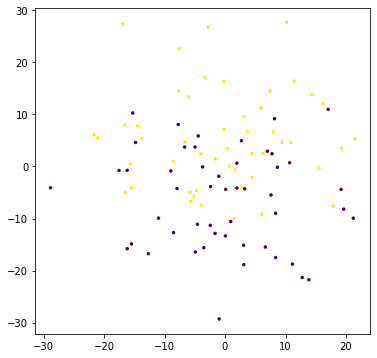

In [171]:
## ## Problem 1b - part 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
#############################################
N = 100;

x, y = datasets.make_blobs(n_samples=N, centers=2, n_features=2, cluster_std=10, random_state=100)
#plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'g^')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
############################################################################
## This part is just adding the dummy variable to the beginning of each x element 
## and changing the values of y to -1 and 1 instead of 0 and 1
n = len(x_train)
x_train = np.c_[np.ones(n), x_train]
#print(x_train)

y_train[y_train == 0] = -1
#print(y_train)

n = len(x_test)
x_test = np.c_[np.ones(n), x_test]
#print(x_train)

y_test[y_test == 0] = -1
#print(y_train)

####################################################################3333
plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1], c=y, s=6)
plt.show()


In [172]:
## I define some helper function to call when running through the perceptron algorithm. 
## First one predicts the value of y, from the weight and x element given.
## Second was to help me sum up all the elements that predicted a wron y value
## Third helped me get the error, similar to the sum function just multiplied by the wi
def y_prediction(x, w):
    return np.sign(x.dot(w))
    
    
def sum_Mk(M_k):
    dummy = 0
    for i in range(0,len(M_k),2):
        dummy = dummy + M_k[i][0]*M_k[i][1]
    
    return dummy

def error_rss(x, y, w):
    diff = y - y_prediction(x,w)
    return diff.T@diff

def error(y_true,y_pred):
    diff =  y_true - y_pred
    
    return diff.T@diff

def sum(x):
    total = 0
    for i in range(len(x)):
        total = total + x[i][0]
        
    return total

In [173]:
## Batch Perceptron Algorithm - for nonseperable data

def avg_batch(x,y,epochs, mu):
    w = np.array([0, 0, 0])
    k = 0
    c = 0
    weight_list = [(w,c)]
    for T in range(epochs-1):
         
        for i in range(len(x)):
            y_pred = y_prediction(x[i],w)
            
            if y_pred == y[i]:
                c += 1
            else:
                w = w + x[i]*y[i]
                c = 1
                k += 1  
                
        weight_list.append([w, c])
          
                
    return weight_list
    
    
def avg(x,y,list):
    prediction = []
    err = []
    for i in range(len(x)):
        y_hat = 0
        ## for a single x value it will calculate and sum the prediction from all the weights
        for j in range(len(list)):
            c = list[j][1]
            w = list[j][0]
            y_hat = y_hat + c*x[i].dot(w)
        ## that prediction is then stored in the prediction array 
        prediction.append(y_hat)
        pred = np.sign(np.array(prediction))
        err.append(err)
    ## returns the prediction for each x value given  
    return pred

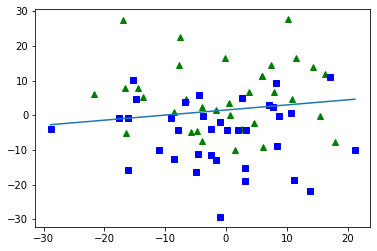

In [174]:
## Assignment 3b part 2
## Gets the list of weights and amount of success that weight had
list = avg_batch(x_train, y_train, 100, 0.01)
## Takes an average of the weights
avg_w = 1/len(list)*sum(list[:])
## Average the prediction based on the set of weights found in average pereptron model
pred = avg(x_test,y_test, list)

## Plotting
plt.plot(x_train[:, 1][y_train == 1], x_train[:, 2][y_train == 1], 'g^')
plt.plot(x_train[:, 1][y_train == -1], x_train[:, 2][y_train == -1], 'bs')

ap_xx = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]))
ap_yy = (avg_w[1]*sp_xx + avg_w[0])/(-1*avg_w[2])
plt.plot(ap_xx, ap_yy)
plt.show()
